# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cast = pd.read_csv("data/cast.csv")
release_dates = pd.read_csv("data/release_dates.csv")
titles = pd.read_csv("data/titles.csv")

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [3]:
print("cast.csv has", len(cast), "records")
print("release_dates.csv has", len(release_dates), "records")
print("titles.csv has", len(titles), "records")

cast.csv has 3442902 records
release_dates.csv has 443486 records
titles.csv has 226013 records


##### Analysis on cast.csv
The results shows that most of the columns' data type are object. This may cause trouble when we run certain analysis, so we need to modify the data type if necessary.

Most columns don't have null values but the "n" column also has more than one third null values. 

The majority of movies are from mid 20th century to early 21th century. The maximum year contained in the cast.csv is 2115, which doesn't make sense. Thus, I deleted the 3 rows which year is 2115.

In [4]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [5]:
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3442902 entries, 0 to 3442901
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 157.6+ MB


In [6]:
cast.isnull().sum()

title              0
year               0
name               0
type               0
character          0
n            1327783
dtype: int64

In [7]:
1327783/3442902

0.38565808727637324

In [8]:
cast['n'].describe()

count    2.115119e+06
mean     1.673178e+01
std      3.209100e+01
min      1.000000e+00
25%      5.000000e+00
50%      1.000000e+01
75%      2.100000e+01
max      3.361300e+04
Name: n, dtype: float64

In [9]:
cast['year'].describe()

count    3.442902e+06
mean     1.987597e+03
std      2.837612e+01
min      1.894000e+03
25%      1.967000e+03
50%      1.999000e+03
75%      2.011000e+03
max      2.115000e+03
Name: year, dtype: float64

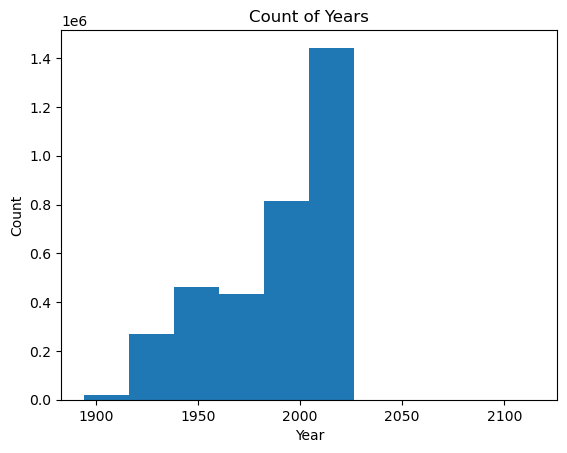

In [10]:
plt.hist(cast['year'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Years')
plt.show()

In [11]:
#check what rows contain year > 2024
cast[cast['year'] > 2024].sort_values(by='year')

,title,year,name,type,character,n
464893,Avatar 5,2025,Cliff Curtis,actor,Tonowari,NaN
748727,Avatar 5,2025,Matt Gerald,actor,Corporal Lyle Wainfleet,NaN
1170295,Avatar 5,2025,Stephen Lang,actor,Miles Quaritch,NaN
1445224,Avatar 5,2025,Joel David Moore,actor,Norm Spellman,NaN
2270934,Avatar 5,2025,Sam Worthington,actor,Jake Sully,NaN
2490668,Avatar 5,2025,Oona (II) Chaplin,actress,Varang,NaN
3128354,Avatar 5,2025,CCH Pounder,actress,Moat,NaN
3203518,Avatar 5,2025,Zoe Saldana,actress,Neytiri,NaN
3390285,Avatar 5,2025,Sigourney Weaver,actress,Grace Augustine,NaN
1295487,100 Years,2115,John Malkovich,actor,Hero,NaN


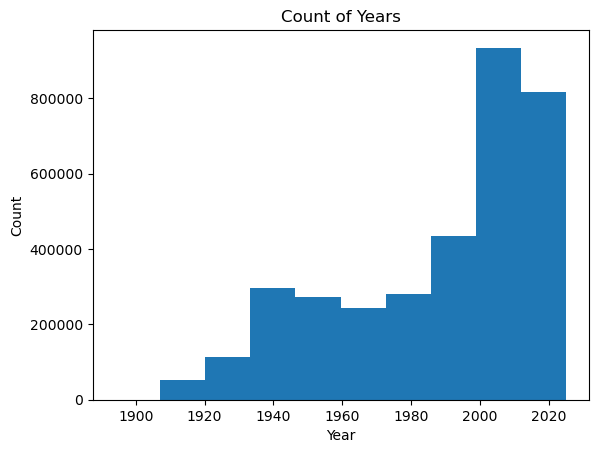

In [12]:
#remove rows which year is 2115
cast= cast[cast['year']!=2115]

#draw the histogram of year again to check if the 3 rows are deleted successfully
plt.hist(cast['year'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Years')
plt.show()

##### Analysis of release_dates.csv
The results shows that most of the columns' data type are object. This is cause trouble when we run certain analysis, so we need to modify the data type if necessary.

No columns have null values.

The majority of movies in the release_dates dataset are also from mid 20th century to early 21th century. The maximum year contained in the release_dates.csv is 2115, which doesn't make sense. Thus, I deleted the 1 rows which year is 2115.

In [13]:
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443486 entries, 0 to 443485
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    443486 non-null  object
 1   year     443486 non-null  int64 
 2   country  443486 non-null  object
 3   date     443486 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB


In [14]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


In [15]:
release_dates.describe()

,year
count,443486.000000
mean,1985.554863
std,28.373819
min,1894.000000
25%,1964.000000
50%,1997.000000
75%,2010.000000
max,2115.000000


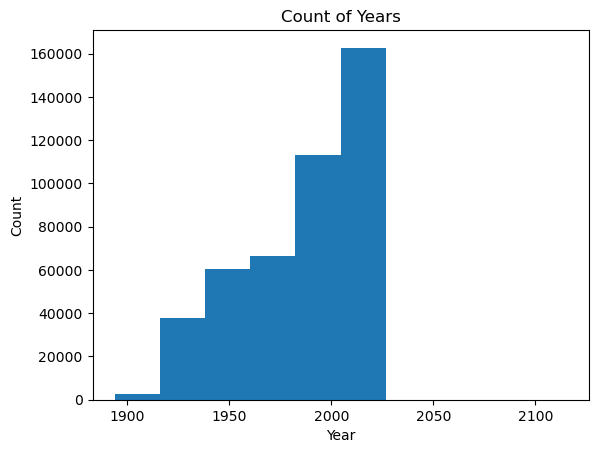

In [16]:
plt.hist(release_dates['year'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Years')
plt.show()

In [17]:
#check what rows contain year > 2024
release_dates[release_dates['year'] > 2024].sort_values(by='year')

,title,year,country,date
30716,Avatar 5,2025,USA,2025-12-19
831,100 Years,2115,France,2115-11-18


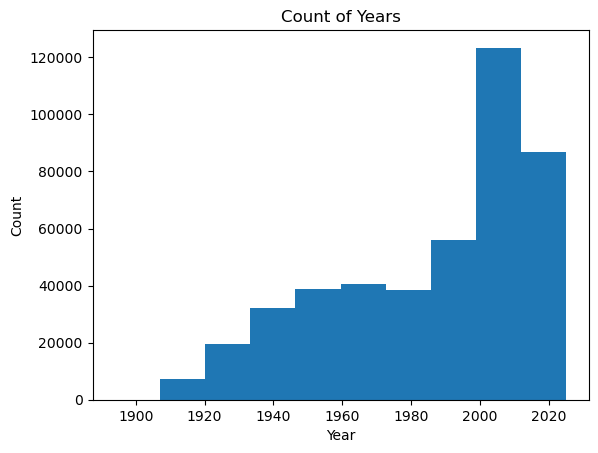

In [18]:
#remove rows which year is 2115
release_dates= release_dates[release_dates['year']!=2115]

#draw the histogram of year again to check if the 3 rows are deleted successfully
plt.hist(release_dates['year'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Years')
plt.show()

##### Analysis of titles.csv
No columns have null values.

The majority of movies in the titles dataset are also from mid 20th century to early 21th century. The maximum year contained in the titles.csv is 2115, which doesn't make sense. Thus, I deleted the 1 rows which year is 2115.

In [19]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226013 entries, 0 to 226012
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   226013 non-null  object
 1   year    226013 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


In [20]:
titles.head()

,title,year
0,Ankara ekspresi,1952
1,"Ans Vaterland, ans teure",1915
2,Miss Mohini,2002
3,La vera madre,1999
4,O Amerikanos,1993


In [21]:
titles.describe()

,year
count,226013.000000
mean,1985.281294
std,29.816257
min,1894.000000
25%,1965.000000
50%,1994.000000
75%,2011.000000
max,2115.000000


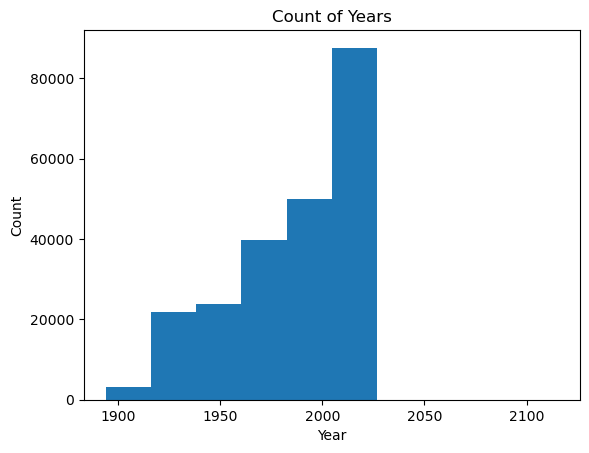

In [22]:
plt.hist(titles['year'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Years')
plt.show()

In [23]:
#check what rows contain year > 2024
titles[titles['year'] > 2024].sort_values(by='year')

,title,year
67170,Avatar 5,2025
125751,The Zero Century: Maetel,2026
60046,100 Years,2115


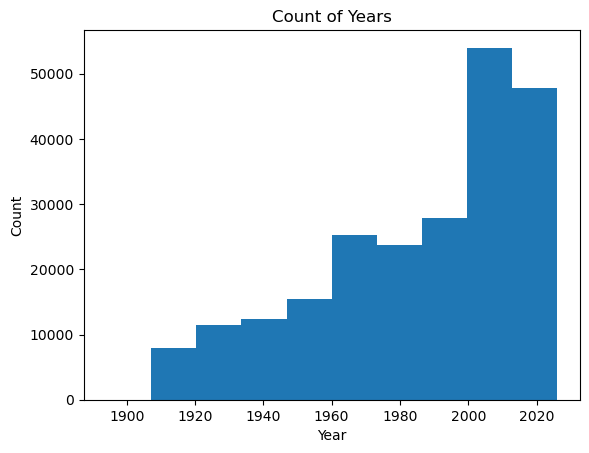

In [24]:
#remove rows which year is 2115
titles= titles[titles['year']!=2115]

#draw the histogram of year again to check if the 3 rows are deleted successfully
plt.hist(titles['year'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Years')
plt.show()

In [25]:
titles['year'].describe()

count    226012.000000
mean       1985.280720
std          29.815074
min        1894.000000
25%        1965.000000
50%        1994.000000
75%        2011.000000
max        2026.000000
Name: year, dtype: float64

### 2. How many movies have the title North by Northwest
If we only look at movies with unique titles that contain "North by Northwest", then there is only 1 movie based on the analysis on the titles.csv.

If we want to know how many versions of movies contain "North by Northwest" even if they have the same name, then there are 18 movies based on the analysis on the release_dates.csv.

In [26]:
titles['title'].str.contains("North by Northwest").sum()

1

In [27]:
release_dates['title'].str.contains("North by Northwest").sum()

18

### 3. How many version of Hamlet are there, when was the first made? the last?
There are 152 versions of Hamlet. The first version is made in 1910, and the last one is made in 2017.

In [28]:
release_dates['title'].str.contains("Hamlet").sum()

152

In [29]:
release_dates[release_dates['title'].str.contains("Hamlet")].sort_values(by='year')

,title,year,country,date
136026,Hamlet,1910,USA,1910-02-02
136027,Hamlet,1911,Denmark,1911-02-27
136028,Hamlet,1911,UK,1911-03-18
136029,Hamlet,1911,USA,1911-04-15
9530,A Sagebrush Hamlet,1919,USA,1919-08-03
...,...,...,...,...
241979,National Theatre Live: Hamlet,2015,Estonia,2015-10-15
136107,Hamlet,2016,USA,2016-04-24
136106,Hamlet,2016,Canada,2016-04-23
289499,Royal Shakespeare Company: Hamlet,2016,UK,2016-06-08


### 4. List all the movies called Treasure Island from oldest to newest

In [30]:
#movies that contain “Treasure Island" in their title
release_dates[release_dates['title'].str.contains("Treasure Island")].sort_values(by='year')

,title,year,country,date
408261,Treasure Island,1918,USA,1918-01-27
408266,Treasure Island,1920,Finland,1923-04-01
408265,Treasure Island,1920,France,1923-01-12
408264,Treasure Island,1920,UK,1921-06-20
408263,Treasure Island,1920,Sweden,1921-03-19
408262,Treasure Island,1920,USA,1920-04-04
408267,Treasure Island,1934,USA,1934-08-17
408269,Treasure Island,1934,Spain,1934-12-28
408268,Treasure Island,1934,Denmark,1934-12-26
408272,Treasure Island,1934,France,1935-02-08


In [31]:
#movies which title equal to “Treasure Island"
release_dates[release_dates['title']=="Treasure Island"].sort_values(by='year')

,title,year,country,date
408261,Treasure Island,1918,USA,1918-01-27
408262,Treasure Island,1920,USA,1920-04-04
408263,Treasure Island,1920,Sweden,1921-03-19
408264,Treasure Island,1920,UK,1921-06-20
408265,Treasure Island,1920,France,1923-01-12
408266,Treasure Island,1920,Finland,1923-04-01
408273,Treasure Island,1934,Portugal,1936-01-07
408272,Treasure Island,1934,France,1935-02-08
408271,Treasure Island,1934,Finland,1935-01-20
408270,Treasure Island,1934,Sweden,1935-01-07


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

3049 movies were made in 1950. 2912 movies were made in 1980. 7216 movies were made in 2000.

The numbers of movies made in 1950 and 1980 are similar to each other, but in 2000, the number of movies is more than doubled. Thus, it is possible to assume that the number of movies increases significantly in the 21th century.

In [32]:
print(release_dates['year'][release_dates['year']==1950].count(), "movies made in 1950")

print(release_dates['year'][release_dates['year']==1980].count(), "movies made in 1980")

print(release_dates['year'][release_dates['year']==2000].count(), "movies made in 2000")

3049 movies made in 1950
2912 movies made in 1980
7216 movies made in 2000


### 6. How big was the cast of Metropolis
The number of casts for the movie with title "Metropolis" is 33. 

In [33]:
cast['name'][cast['title']=="Metropolis"].count()

33

### 7. How many roles for actors were there 1950's? 1990's

There are 153559 total roles for actors in 1950s.

There are 90603  total unique roles for actors in 1950s.

There are 245713   total roles for actors in 1990s.

There are 134449   total unique roles for actors in 1990s.

In [34]:
print(cast['character'][(cast['type']=='actor')&(cast['year']>=1950)&(cast['year']<1960)].count(), "total roles for actors in 1950")

print(cast['character'][(cast['type']=='actor')&(cast['year']>=1950)&(cast['year']<1960)].nunique(), "total unique roles for actors in 1950")

print(cast['character'][(cast['type']=='actor')&(cast['year']>=1990)&(cast['year']<2000)].count(), "total roles for actors in 1990")

print(cast['character'][(cast['type']=='actor')&(cast['year']>=1990)&(cast['year']<2000)].nunique(), "total unique roles for actors in 1990")

153559 total roles for actors in 1950
90603 total unique roles for actors in 1950
245713 total roles for actors in 1990
134449 total unique roles for actors in 1990


### 8. How many roles for actors & actresses over time? Output should be a line graph

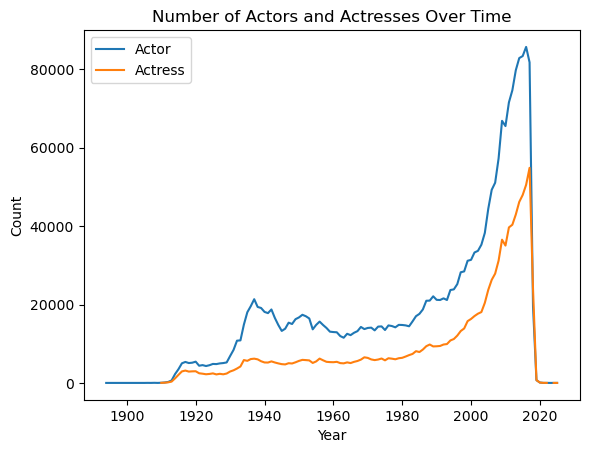

In [35]:
year_type_group = cast.groupby(['year', 'type']).size().unstack()

plt.plot(year_type_group)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Actors and Actresses Over Time')
plt.legend(['Actor','Actress' ], loc='best')
plt.show()

In [36]:
year_type_group

type,actor,actress
year,,
1894,2.0,1.0
1900,2.0,NaN
1905,1.0,NaN
1906,14.0,3.0
1907,5.0,NaN
...,...,...
2021,14.0,20.0
2022,12.0,4.0
2023,2.0,NaN


### 9. How many "leading roles" were there in the 2000's?

There are 23593 roles that has the "1" ranking/

In [37]:
cast['n'][(cast['year']>=2000)&(cast['year']<2010)&(cast['n']==1)].count()

23593

### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?
In 1950s, there are 95406 roles received no ranking, and it is 45.45523845824003 percent of total roles in the 1950s.

In 2000s, there are 232037 roles received no ranking, and it is 34.32362908582054 percent of total roles in the 2000s.

Based on these numbers, I learn that more although there are more roles in 2000s than 1950s, roles in the 2000s receive more ranking than those in the 1950s.



In [38]:
#count the number of roles received no ranking in the 1950s
no_ranking_50 = cast['name'][(cast['year']>=1950)&(cast['year']<1960)&(cast['n'].isna())].count()
#calculate the percentage of roles received no ranking in the 1950s by dividing the total roles in 1950s
percentage_50=no_ranking_50/cast['character'][(cast['year']>=1950)&(cast['year']<1960)].count()*100
print("In 1950s, there are", no_ranking_50, "roles received no ranking, and it is", percentage_50,"percent of total roles in the 1950s")


#count the number of roles received no ranking in the 2000s
no_ranking_2000 = cast['name'][(cast['year']>=2000)&(cast['year']<2010)&(cast['n'].isna())].count()
#calculate the percentage of roles received no ranking in the 2000s by dividing the total roles in 2000s
percentage_2000=no_ranking_2000/cast['character'][(cast['year']>=2000)&(cast['year']<2010)].count()*100
print("In 2000s, there are", no_ranking_2000, "roles received no ranking, and it is", percentage_2000,"percent of total roles in the 2000s")


In 1950s, there are 95406 roles received no ranking, and it is 45.45523845824003 percent of total roles in the 1950s
In 2000s, there are 232037 roles received no ranking, and it is 34.32362908582054 percent of total roles in the 2000s


### 11. Plot the number of films made in each decade

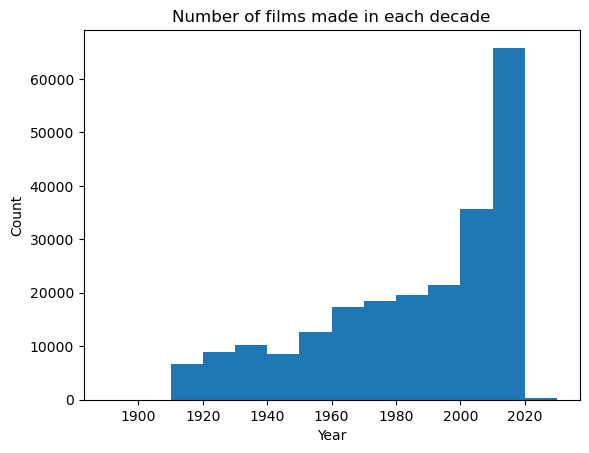

In [39]:
#first create the bins of each decade of years
bin_range = list(range(1890,2031,10)) #because the previous analysis shows that the minium is 1894 and the maximum after deleting 2115 is 2026
bin_labels = [f'{start}-{start + 9}' for start in range(1890, 2030, 10)]

#create a column for the bins
titles['decade'] = pd.cut(titles['year'], bins=bin_range, labels=bin_labels, right=False)

#group the data into each decade
film_decade = titles.groupby('decade').size()

#plot a histogram
plt.hist(titles['year'],bins=bin_range)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of films made in each decade')
plt.show()

In [40]:
film_decade

decade
1890-1899        3
1900-1909       39
1910-1919     6752
1920-1929     8954
1930-1939    10245
1940-1949     8561
1950-1959    12664
1960-1969    17419
1970-1979    18476
1980-1989    19532
1990-1999    21547
2000-2009    35730
2010-2019    65830
2020-2029      260
dtype: int64

### 12. Plot the number of films with a Rustler character over time

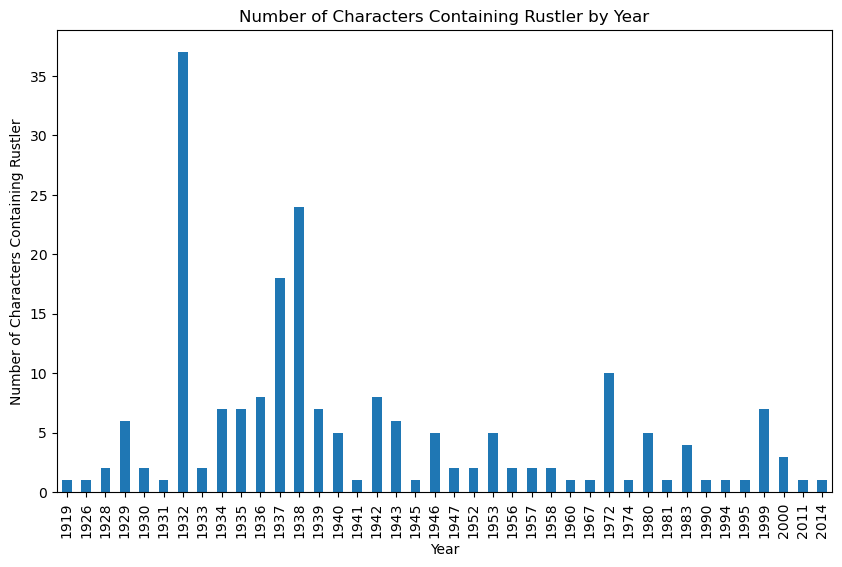

In [41]:
# Filter rows where 'character' contains 'rustler' (case insensitive)
rustler_count_by_year = cast[cast['character'].str.contains('rustler', case=False)]

# Group by 'year' and count the number of rows for each year
rustler_count_by_year = rustler_count_by_year.groupby('year').size()

# Plot the number of rows where 'character' contains 'rustler' each year
rustler_count_by_year.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Characters Containing Rustler')
plt.title('Number of Characters Containing Rustler by Year')
plt.show()

In [42]:
rustler_count_by_year

year
1919     1
1926     1
1928     2
1929     6
1930     2
1931     1
1932    37
1933     2
1934     7
1935     7
1936     8
1937    18
1938    24
1939     7
1940     5
1941     1
1942     8
1943     6
1945     1
1946     5
1947     2
1952     2
1953     5
1956     2
1957     2
1958     2
1960     1
1967     1
1972    10
1974     1
1980     5
1981     1
1983     4
1990     1
1994     1
1995     1
1999     7
2000     3
2011     1
2014     1
dtype: int64

### 13. What are the top ten character names of all time?
The top 10 character names of all time are (from descending order): Himself, Dancer, Extra, Reporter, Doctor, Party Guest, Student, Policeman, Bartender, Herself

In [43]:
cast.groupby('character').size().sort_values(ascending=False).head(10)

character
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
dtype: int64

### 14. Which actor appeared in the most films in the 1990's decade?
Shakti Kapoor

In [44]:
cast[(cast['type']=='actor')&(cast['year']>=1990)&(cast['year']<1999)].groupby('name').size().sort_values(ascending=False)

name
Shakti Kapoor        128
Anupam Kher          112
Kader Khan           112
Gulshan Grover       112
Brahmanandam         105
                    ... 
J. Wesley Adams        1
J. Watlington          1
J. Walter Call         1
J. Walker Fischer      1
Þórir Waagfjörð        1
Length: 111044, dtype: int64

### 15. What are the top 10 roles that start with Science?
The top 10 roles that start with Science: Science Teacher, Science Fair Student, Science Fair Judge, Science Student, Science Kid, Science Reporter, Science Fair Kid, Science, Science teacher, Science Officer 

In [45]:
science = cast[(cast['character'].str.startswith("Science"))]
science.groupby('character').size().sort_values(ascending=False).head(10)

character
Science Teacher         57
Science Fair Student     9
Science Fair Judge       6
Science Student          6
Science Kid              5
Science Reporter         5
Science Fair Kid         5
Science                  4
Science teacher          3
Science Officer          3
dtype: int64

### 16. What film has the largest cast
The movie "Around the World in 80 days" has the largest number of cast of 1364 names

In [46]:
cast.groupby('title').size().sort_values(ascending=False)

title
Around the World in 80 Days    1364
Hello Au Revoir                 726
7 cajas                         689
Thelma                          593
The Ten Commandments            536
                               ... 
Prosto z nieba                    1
Athili Sathibabu LKG              1
Prostodushnyy                     1
Urban Turban                      1
Daughter's of the Concrete        1
Length: 168254, dtype: int64

### 17. Generate descriptive statistics for cast size. Briefly comment on the results
Based on the descriptive statistics for the cast size of each movie, I can learn that the minimum number of cast is only 1, while the maximum number of cast size can go up to 1364. The average cast size is about 20 people.

In [47]:
cast.groupby('title').size().describe()

count    168254.000000
mean         20.462509
std          24.206651
min           1.000000
25%           6.000000
50%          13.000000
75%          26.000000
max        1364.000000
dtype: float64

### 18. How many films has Natalie Portman been in in each year throughout her career?

In [48]:
np = cast[cast['name']=="Natalie Portman"].groupby('year').size()
np

year
1995    1
1996    3
1999    3
2000    1
2001    1
2002    1
2003    1
2004    2
2005    4
2006    2
2007    3
2008    1
2009    2
2010    4
2011    3
2013    1
2015    4
2016    3
2017    1
dtype: int64

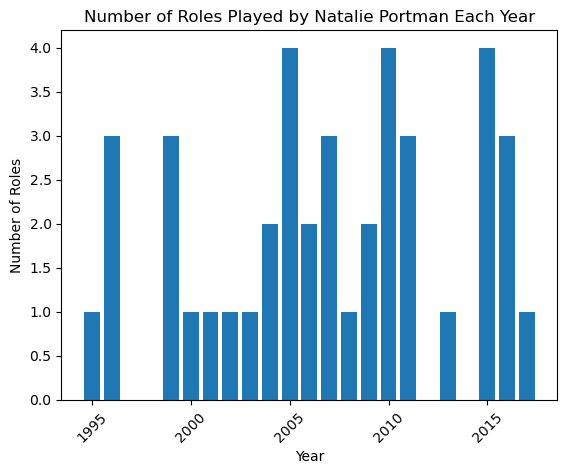

In [49]:
plt.bar(np.index,np)
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.title('Number of Roles Played by Natalie Portman Each Year')
plt.xticks(rotation=45)
plt.show()

### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [50]:
np_top = cast[(cast['name']=="Natalie Portman")&(cast['n']==1.0)]
np_top_count_by_year = np_top.groupby('year').size()

np_top_count_by_year

year
2000    1
2005    2
2008    1
2009    1
2010    2
2011    1
2015    2
2016    2
dtype: int64

In [51]:
np_co = cast[(cast['name']=="Natalie Portman")&(cast['n']==2.0)]
np_co_count_by_year = np_co.groupby('year').size()

np_co_count_by_year

year
1999    1
2002    1
2005    1
2006    2
2007    1
2011    1
2013    1
dtype: int64

### 20. Determine how many roles for actor or actress by decade. Plot the output 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


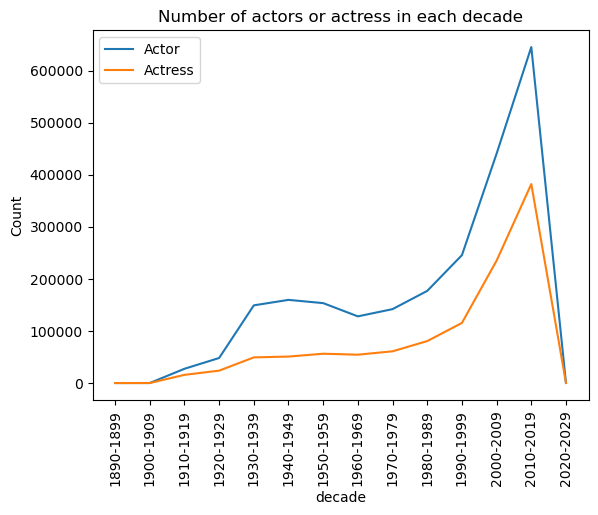

In [52]:
#created the bins of each decade of years before: variable "bin_range" & "bin_labels

#create a column in the cast.csv for the bins
cast['decade'] = pd.cut(cast['year'], bins=bin_range, labels=bin_labels, right=False)

#group the data into each decade
type_decade = cast.groupby(['decade','type']).size().unstack()

#plot
plt.plot(type_decade)
plt.xlabel('decade')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Number of actors or actress in each decade')
plt.legend(title='Type')
plt.legend(['Actor','Actress' ], loc='best')
plt.show()

In [53]:
type_decade

type,actor,actress
decade,,
1890-1899,2,1
1900-1909,54,16
1910-1919,27396,15733
1920-1929,48112,23826
1930-1939,149272,49298
1940-1949,159799,50871
1950-1959,153559,56331
1960-1969,128132,54484
1970-1979,142015,60977


### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)
I notice significant difference in release days which most films are released on Friday and Thursday. As for months, the difference between months are less significant, and March and October are the most popular months. 

In [54]:
release_dates['date'] = pd.to_datetime(release_dates['date'])

release_dates['weekday'] = release_dates['date'].dt.day_name()

weekday_pattern = pd.pivot_table(release_dates, index='weekday', aggfunc='size').reset_index(name='count').sort_values(by = 'count', ascending=False)
weekday_pattern

,weekday,count
0,Friday,163174
4,Thursday,125746
6,Wednesday,53439
1,Monday,37209
2,Saturday,31332
5,Tuesday,16762
3,Sunday,15823


In [55]:
release_dates['month'] = release_dates['date'].dt.month_name()
month_pattern = pd.pivot_table(release_dates, index='month', aggfunc='size').reset_index(name='count').sort_values(by = 'count', ascending=False)
month_pattern

,month,count
7,March,40257
10,October,40204
4,January,39412
2,December,39096
9,November,38200
11,September,37750
0,April,37674
3,February,36307
8,May,35449
1,August,35011


### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?
The pivot table cannot be plotted becausethe pivot table is being categorized as numpy array. To fix it, I specify the column names when creating plots.

TypeError: unhashable type: 'numpy.ndarray'

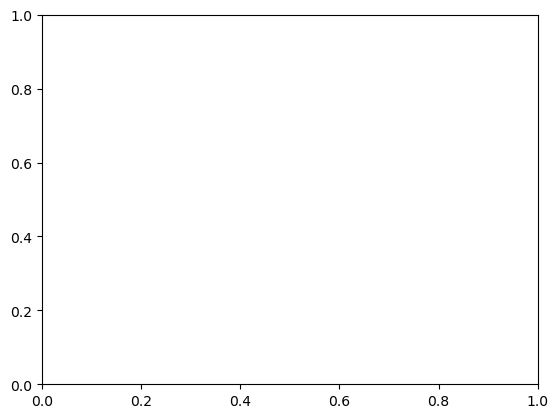

In [56]:
plt.plot(weekday_pattern)
plt.show()

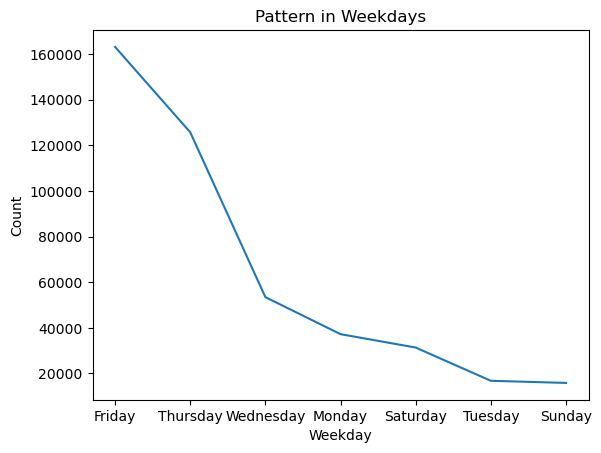

In [58]:
plt.plot(weekday_pattern['weekday'], weekday_pattern['count'])
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Pattern in Weekdays')
plt.show()

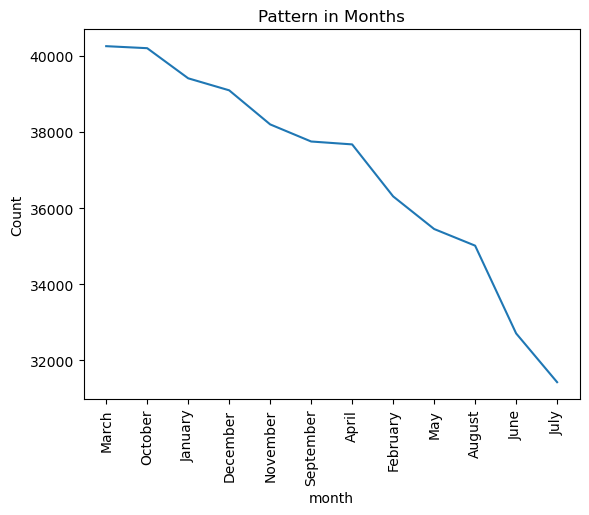

In [59]:
plt.plot(month_pattern['month'], month_pattern['count'])
plt.xlabel('month')
plt.ylabel('Count')
plt.title('Pattern in Months')
plt.xticks(rotation=90) 
plt.show()

### 23. What films did actors in Star Wars go on to appear in? 

In [60]:
#find out the actors in all Star Wars films
starwars_actor = cast['name'][(cast['title'].str.contains('star wars',case=False))&(cast['type']=='actor')].unique()

#find out what other films these actors are in
mask = cast['name'].isin(starwars_actor)
starwars_actor_film = cast[mask]

#filter out the rows which title contains Star Wars
mask = ~starwars_actor_film['title'].str.contains('star wars', case=False)

# Use the boolean mask to filter the rows
starwars_actor_film_f = starwars_actor_film[mask]
starwars_actor_film_f

,title,year,name,type,character,n,decade
3900,Addams Family Values,1993,Ian Abercrombie,actor,Driver,41.0,1990-1999
3901,Blasphemy the Movie,2001,Ian Abercrombie,actor,Zeus,NaN,2000-2009
3902,Chromiumblue.com,2003,Ian Abercrombie,actor,Sir George,NaN,2000-2009
3903,Clean Slate,1994,Ian Abercrombie,actor,Leader,24.0,1990-1999
3904,Firewalker,1986,Ian Abercrombie,actor,Boggs,7.0,1980-1989
...,...,...,...,...,...,...,...
2286212,Middleton's Changeling,1998,Miltos Yerolemou,actor,Asylum Inmate,NaN,1990-1999
2286214,The Danish Girl,2015,Miltos Yerolemou,actor,Dr. Mai,27.0,2010-2019
2286215,The Inbetweeners Movie,2011,Miltos Yerolemou,actor,Stavros,NaN,2010-2019
2286216,The West Wittering Affair,2006,Miltos Yerolemou,actor,Man in therapy,NaN,2000-2009
